### Ejemplo de uso de toolbox_ML
En este notebook se presenta un ejemplo práctico de cómo utilizar las funciones implementadas en toolbox_ML.py para realizar análisis exploratorio de datos y selección de variables en un problema de regresión.

**Nota:**
Las funciones de toolbox_ML.py permiten analizar y seleccionar features de manera rápida y automatizada. Para datasets grandes o con muchas categorías, se recomienda:
- Ajustar los umbrales de correlación y cardinalidad según las características del dataset.
- Graficar variables en bloques para evitar saturación visual y warnings de visualización.
- Revisar manualmente la tipificación de variables y los resultados estadísticos para asegurar que tengan sentido.

In [1]:
import pandas as pd

from toolbox_ML import (
    describe_df,
    tipifica_variables,
    get_features_num_regression,
    plot_features_num_regression,
    get_features_cat_regression,
    plot_features_cat_regression
)

In [9]:
df = pd.read_csv("./data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
target = "MonthlyCharges"

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
describe_df(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
DATA_TYPE,object,object,int64,object,object,int64,object,object,object,object,...,object,object,object,object,object,object,object,float64,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,7043,2,2,2,2,73,2,3,3,3,...,3,3,3,3,3,2,4,1585,6531,2
CARDIN (%),100.0,0.03,0.03,0.03,0.03,1.04,0.03,0.04,0.04,0.04,...,0.04,0.04,0.04,0.04,0.04,0.03,0.06,22.5,92.73,0.03


In [11]:
tipifica_variables(df, umbral_categoria=10, umbral_continua=15.0)

,nombre_variable,tipo_sugerido
0,customerID,Numerica Continua
1,gender,Binaria
2,SeniorCitizen,Binaria
3,Partner,Binaria
4,Dependents,Binaria
5,tenure,Numerica Discreta
6,PhoneService,Binaria
7,MultipleLines,Categorica
8,InternetService,Categorica
9,OnlineSecurity,Categorica


In [12]:
num_feats = get_features_num_regression(
    df,
    target_col=target,
    umbral_corr=0.2
)

num_feats

['SeniorCitizen', 'tenure']

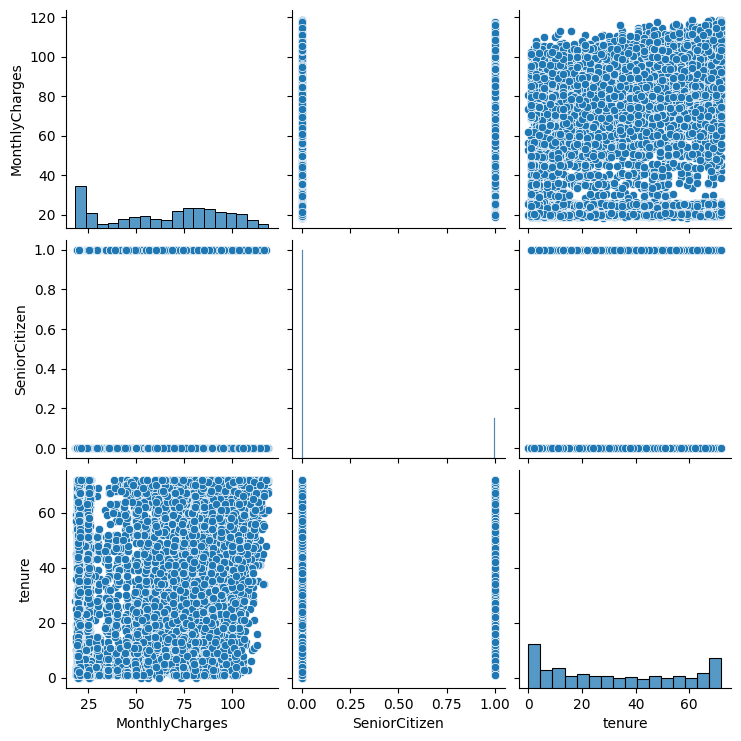

['SeniorCitizen', 'tenure']

In [13]:
plot_features_num_regression(
    df,
    target_col=target,
    columns=num_feats,
    umbral_corr=0.2
)

In [14]:
cat_feats = get_features_cat_regression(
    df,
    target_col=target,
    pvalue=0.05
)

cat_feats

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
/Users/camilafiore/Documents/GitHub/Team_Challenge_ToolBox/toolbox_ML.py:400: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_statistic, p_value = stats.f_oneway(*group_data)


['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

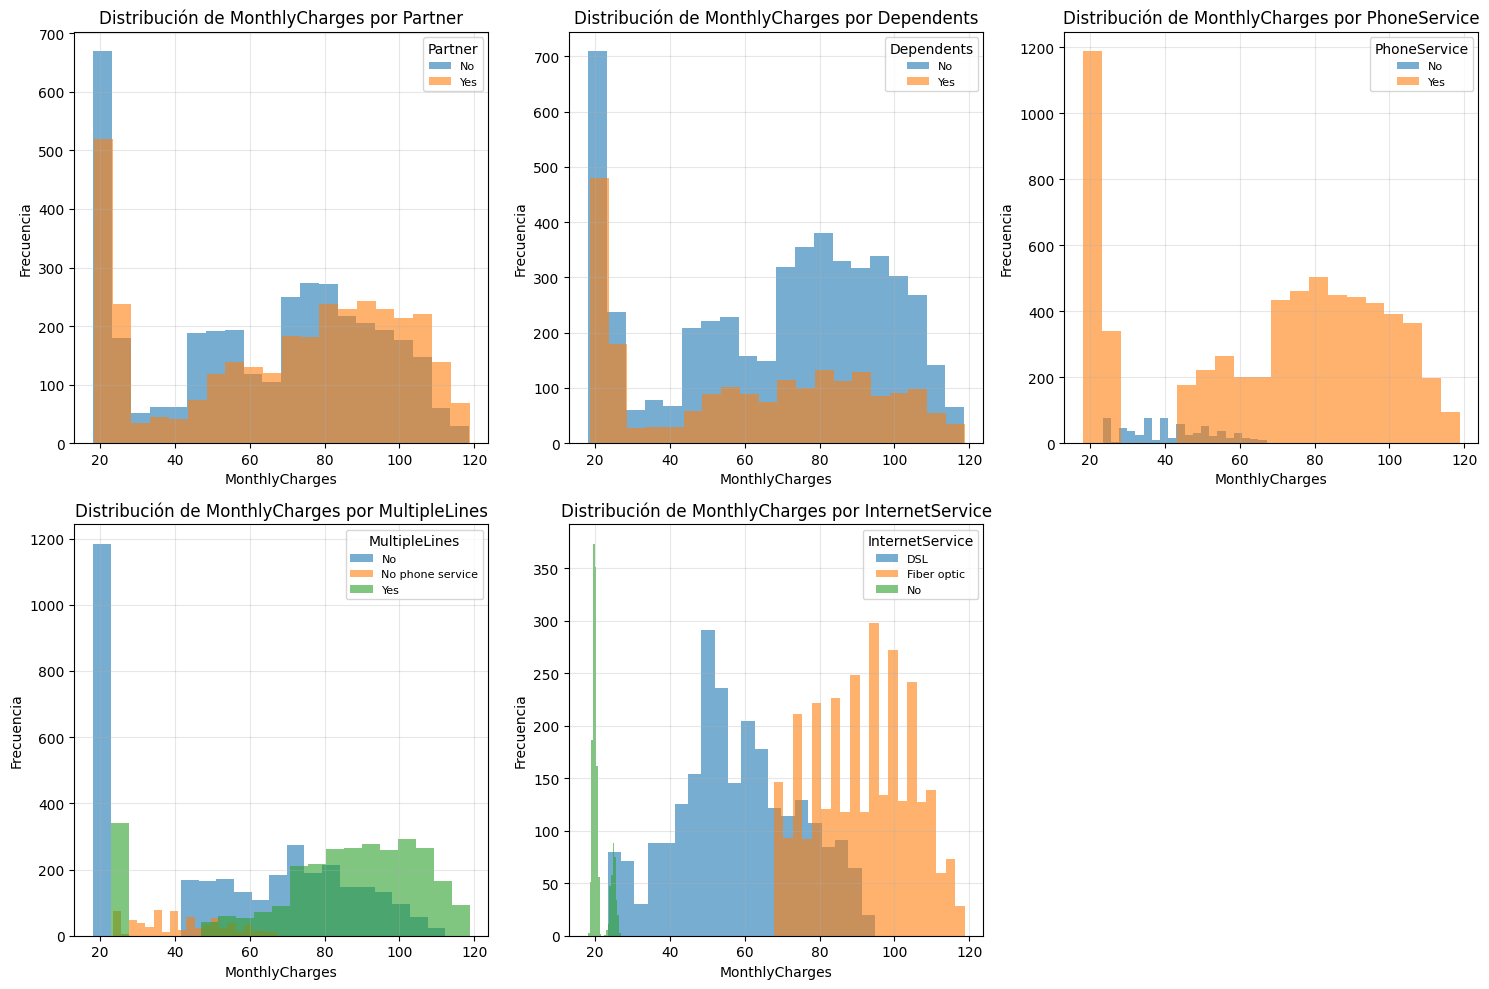

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService']

In [15]:
plot_features_cat_regression(
    df,
    target_col=target,
    columns=cat_feats[:5],
    pvalue=0.05
)